In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_kick=pd.read_csv('car_kick2.csv')

In [3]:
car_kick.head()

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,WarrantyCost,Auction,...,Transmission,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,VNZIP1,VNST,IsOnlineSale,Class
0,2010-11-17,2006,4,51954,6197.0,7062.0,9605.0,10426.0,1086.0,Manheim,...,Auto,2,Covers,American,Medium,Chrysler,32124,FL,0,0
1,2009-05-19,2005,4,89127,3688.0,4783.0,4483.0,5666.0,983.0,Adesa,...,Auto,2,Covers,American,Medium,Ford,78754,TX,0,0
2,2009-07-22,2006,3,71271,6897.0,8449.0,7949.0,9625.0,1974.0,Manheim,...,Auto,1,Alloy,American,Large,Gm,80011,CO,0,0
3,2010-09-29,2008,2,83338,7878.0,8925.0,11723.0,13026.0,2152.0,Manheim,...,Auto,2,Covers,American,Large,Gm,94544,CA,0,0
4,2009-03-18,2007,2,58698,8800.0,10091.0,10004.0,11398.0,1500.0,Adesa,...,Auto,1,Alloy,American,Large,Gm,77086,TX,0,0


In [4]:
car_kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66560 entries, 0 to 66559
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchDate                          66560 non-null  object 
 1   VehYear                            66560 non-null  int64  
 2   VehicleAge                         66560 non-null  int64  
 3   VehOdo                             66560 non-null  int64  
 4   MMRAcquisitionAuctionAveragePrice  66560 non-null  float64
 5   MMRAcquisitionAuctionCleanPrice    66560 non-null  float64
 6   MMRAcquisitionRetailAveragePrice   66560 non-null  float64
 7   MMRAcquisitonRetailCleanPrice      66560 non-null  float64
 8   WarrantyCost                       66560 non-null  float64
 9   Auction                            66560 non-null  object 
 10  Make                               66560 non-null  object 
 11  Model                              66560 non-null  obj

## 1. Distributions of data

We'll start our explotary data analysis with the 'PurchDate' column to find out the earliest and the latest car auction dates in our dataset.

In [5]:
min_date=min(car_kick['PurchDate'])
max_date=max(car_kick['PurchDate'])
print('Earliest car auction date: '+ min_date)
print('Latest car auction date: '+ max_date)

Earliest car auction date: 2009-01-05
Latest car auction date: 2010-12-30


So our dataset contains car auctions information for two years(2009-2010). <br>
We can move on to 'Vehyear' and 'VehicleAge' columns to show the distribution of the values in this column.

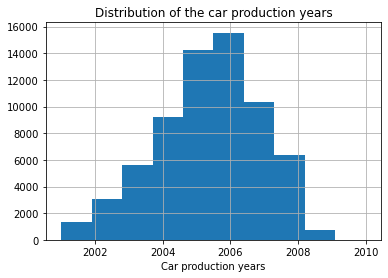

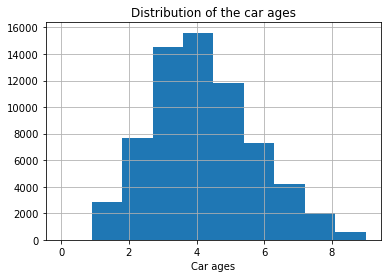

In [6]:
car_kick['VehYear'].hist()
plt.title('Distribution of the car production years')
plt.xlabel('Car production years')
plt.show()

car_kick['VehicleAge'].hist()
plt.title('Distribution of the car ages')
plt.xlabel('Car ages')
plt.show()

From the graph above we can see that most of the cars were produced between years 2004 and 2007. And both graphs have the same values but the opposite distribution of values. 

Let's move on to the 'VehOdo' column which shows the mileage of the car.

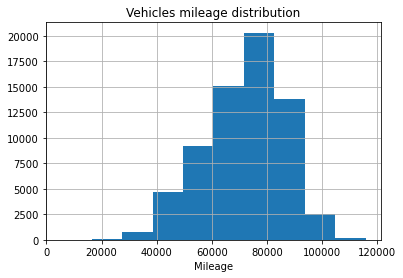

In [7]:
car_kick['VehOdo'].hist()
plt.title('Vehicles mileage distribution')
plt.xlabel('Mileage')
plt.show()

Most of the cars have mileage between 60.000 and 90.000 which are average values for 3-6 years cars. Let's rename this column and the previous 2 columns to make the process of working with them easier.

In [8]:
car_kick.rename(columns={'VehYear': 'Year', 'VehicleAge':'Age', 'VehOdo':'Mileage'}, inplace=True)

Next, we have the price columns. We didn't rename them after dropping the current price columns. We can do it now before moving on to plotting the values distribution.

In [9]:
car_kick.rename(columns={'MMRAcquisitionAuctionAveragePrice':'ActnAvgPrice', 'MMRAcquisitionAuctionCleanPrice':'ActnClnPrice', 'MMRAcquisitionRetailAveragePrice':'RetlAvgPrice', 'MMRAcquisitonRetailCleanPrice':'RetlClnPrice'}, inplace=True)

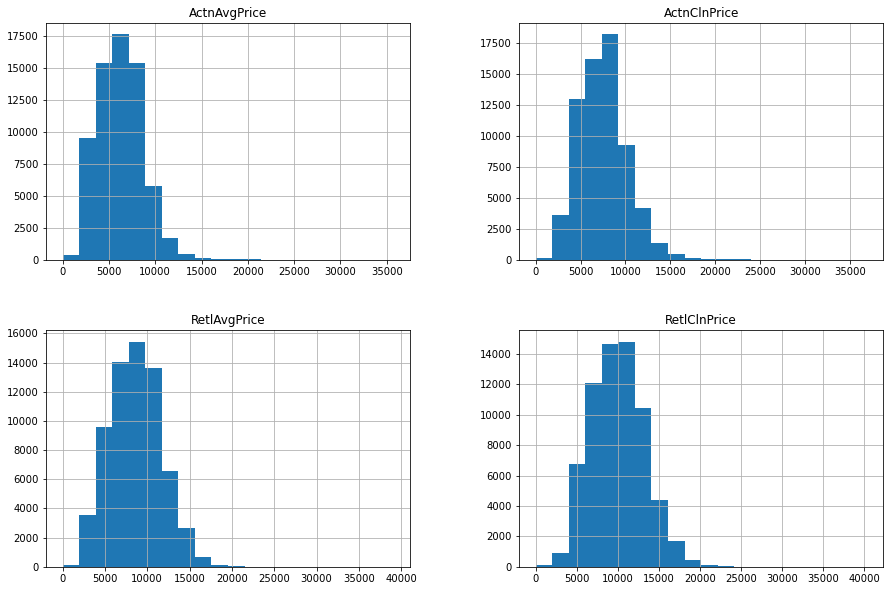

In [10]:
price_cols=['ActnAvgPrice', 'ActnClnPrice', 'RetlAvgPrice', 'RetlClnPrice']
car_kick[price_cols].hist(figsize=(15, 10), bins=20)
plt.show()

All of the price columns have similar distribution and are close to normal distribution. <br>
Now we can take a look at the other numerical columns distributions.

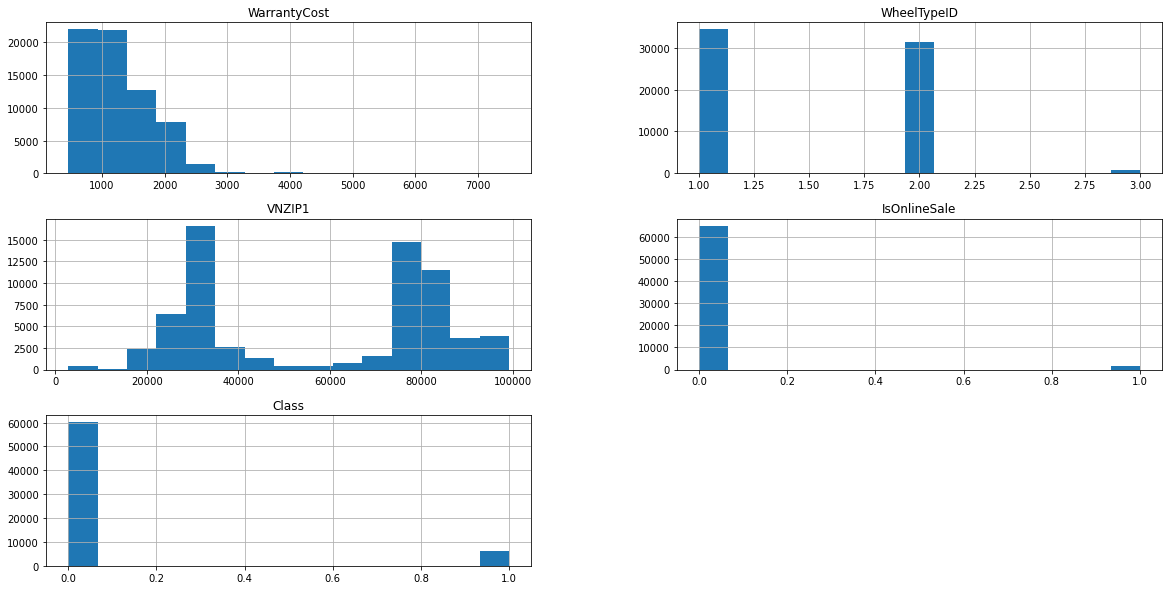

In [11]:
car_kick.iloc[:, 8:].hist(figsize=(20, 10), bins=15)
plt.show()

Here we have the 'WarrantyCost' column, which has slightly right-skewed distribution and it should be higly correlated with the price columns. <br>
The 'WheelTypeID' column as we mentioned in the data wrangling stage of the project shows the same information as the 'Wheeltype' column, but the labels are numbers instead of words. <br>
The 'VNZIP1' column shows the zip code of the cars registration and it should be categorical. <br>
Very small part of the auctions are online, which makes harder to use this column for our future model.And the 'Class' column is the target column for our model which shows whether the car is a 'kick' or not.

In [12]:
car_kick['VNZIP1']=car_kick['VNZIP1'].astype('object')

Now we'll take a look at our categorical data columns:

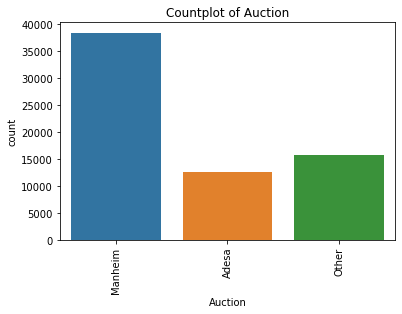

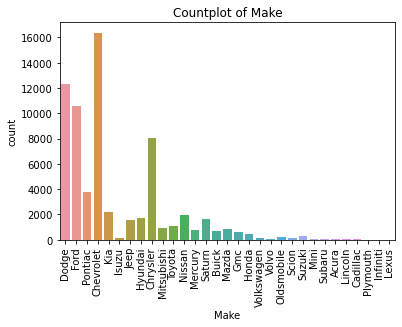

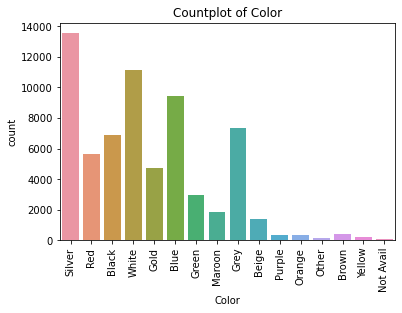

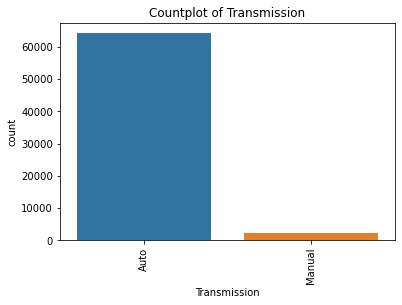

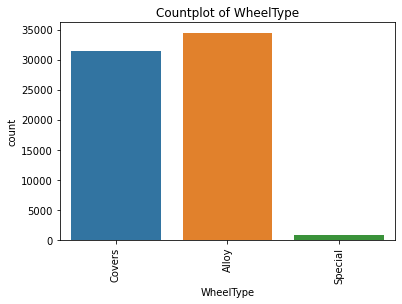

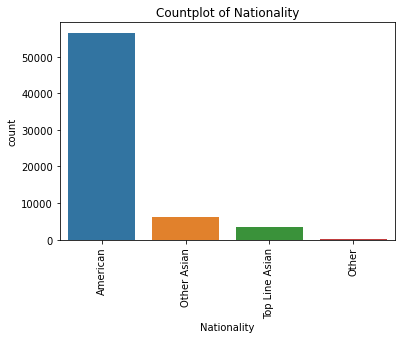

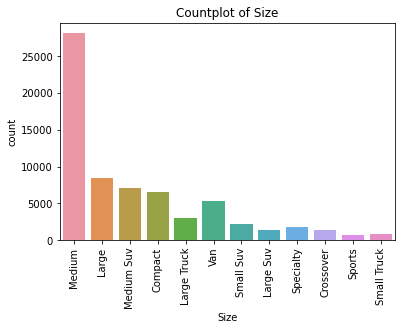

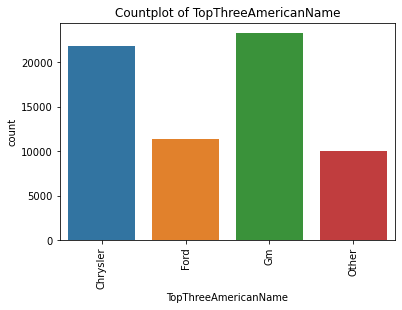

In [13]:
cat_cols=['Auction', 'Make', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName']
fig, ax=plt.subplots()
for col in cat_cols:
    sns.countplot(data=car_kick, x=col, orient='v')
    plt.title('Countplot of '+col)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

The countplots above show us that the vast majority of the cars sold in our dataset are medium size american cars with automatic transmission in some 'boring' colors.

## 2. Data relationships
Now we'll try to investigate variable relationships using a heatmap and a correlation table.

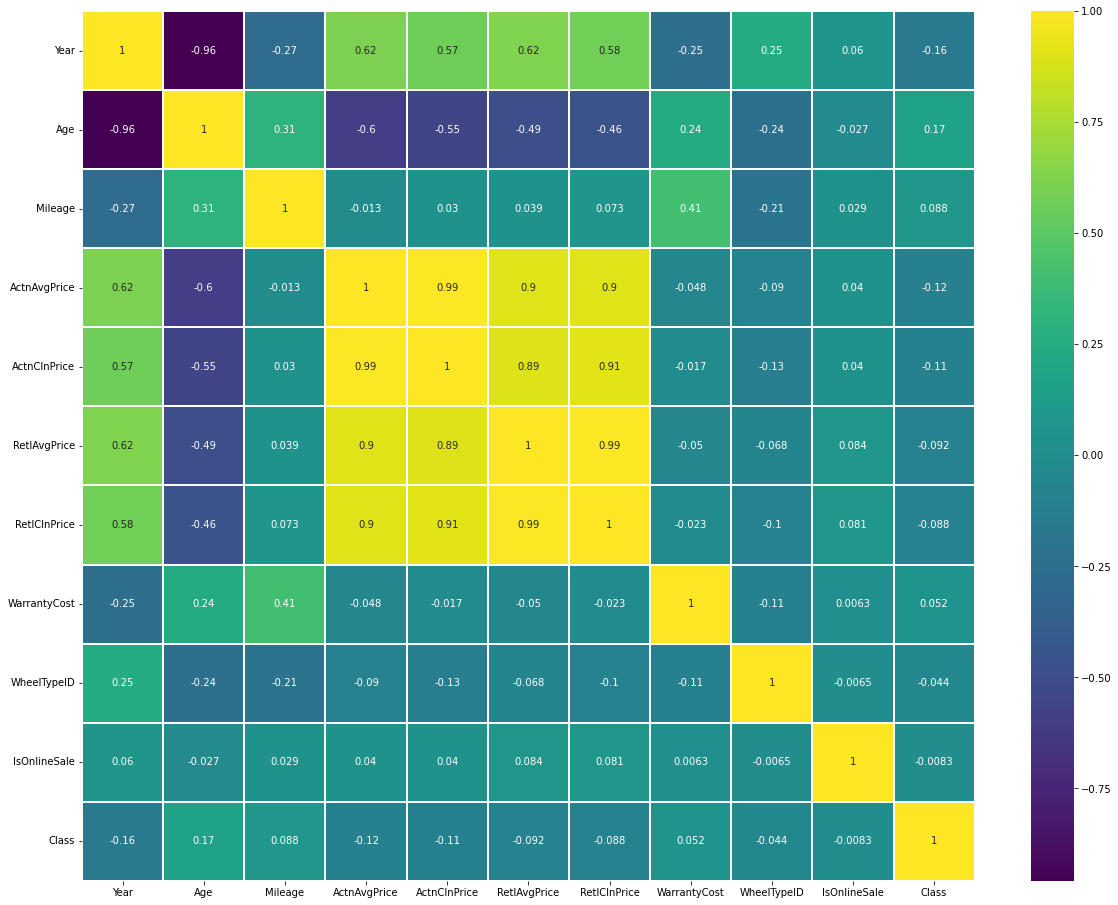

In [14]:
plt.figure(figsize=(20,16))
sns.heatmap(car_kick.corr(), linewidths=.1, annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.show()

So, the heatmap shows that there is very high correlation between price columns, which was expected. <br>
There is high negative correlation between the 'Age' and the 'Year' columns, which again was expected considering the fact that they represent the same thing. <br>
Also there is some strong correlation between the year and price columns. <br>
And we can notice some moderate correlation between 'Mileage' and 'WarrantyCost', and between these columns and 'Age' column. <br>

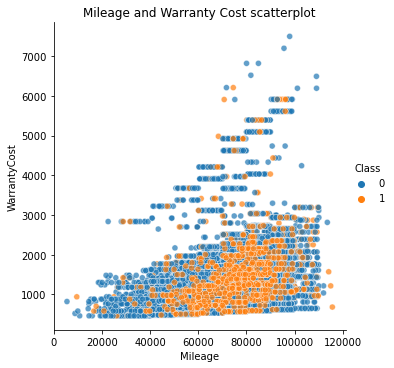

In [15]:
sns.relplot(x='Mileage', y='WarrantyCost', data=car_kick, kind='scatter', hue='Class', alpha=0.7)
plt.title('Mileage and Warranty Cost scatterplot')
plt.show()

We can see the moderate positive correlation between the warranty cost and mileage. We also can see that most of the car kicks have mileage between 40.000 and 90.000. For the low mileage cars it can be explained with the fact that low mileage cars usually have fewer problems which can make them a 'kick'. And, on the other hand the high mileage cars tend to have more problems which can make them a 'kick'. But as we can see most of the cars that have mileage higher than 90.000 are not kicks. Apparently a lot of 'kick' cars have roll backed odometer which is one of the main criterions of being a 'kick' car.

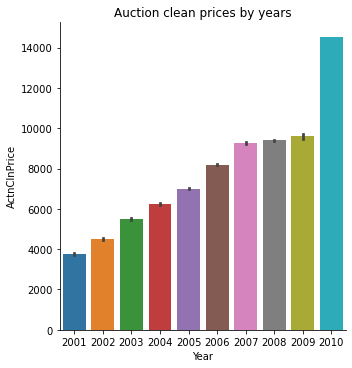

In [16]:
sns.catplot(x='Year', y='ActnClnPrice', data=car_kick, kind='bar')
plt.title('Auction clean prices by years')
plt.show()

We can see the positive correlation between the average price and year columns from the bar plot above. The only year which has significant increase in average price compared to the previous year is 2010 which can be explained by the fact that new cars lose almost 20% of their value in the first year considering the fact that data was collected in 2010. <br>

In [17]:
car_kick.to_csv('car_kick3.csv', index=False)